# Observations and Insights 

### 1. The Pearson correlation coefficient measures how data points move in relationship to one another. For mice treated with Capomuline, the average tumor volume and mouse weight measured a Pearson coefficient of 0.84 (see Fig. 5). The average all drugs was 0.66 (see Fig. 10). It seems, for mice on Capomulin, the larger the mouse, the larger the tumor volume. (see Fig. 6).

### 2. Mice on the Capomulin and Ramicane regimens saw an average decrease in tumor volume over 45 days of treatment (see Fig. 3, Fig. 4a, Fig. 7, Fig. 8).

### 3. Capomulin and Ramicane were tests on 10-20% more mice than average (see Fig. 1). These two drugs also saw significantly higher Pearson coefficients than the other drugs tested (see Additional Data).

# Dependencies and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from sklearn import datasets
from scipy.stats import linregress
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
## Create duplicate of complete data set
study_df = mouse_study_df.copy()

## Check for complete data
study_df.count()

# Checking the number of mice
study_df["Mouse ID"].value_counts()

#249 Mouse IDs

g989    13
j913    10
m546    10
c402    10
p136    10
        ..
h428     1
u153     1
o848     1
n482     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Identify how many rows have duplicate values for Mouse ID & Timempoint
study_df.loc[study_df.duplicated(subset=["Mouse ID","Timepoint"]),:] #5 duplicate values found

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
## Confirm duplicates by ID and Timepoint
study_df.loc[908:920,:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = study_df.loc[study_df.duplicated(subset=["Mouse ID","Timepoint"]),:]
duplicate_mouse_ids
# Mouse g989 had data input twice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_df.drop_duplicates(subset=["Mouse ID","Timepoint"])
study_df.shape

(1893, 8)

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df.shape #5 duplicates removed

(1888, 8)

## Summary Statistics

In [8]:
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation of the tumor volume for each regimen
tumor_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_mean #SUCCESS

tumor_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_median #SUCCESS

tumor_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_var #SUCCESS

tumor_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_std #SUCCESS

tumor_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
tumor_sem #SUCCESS?

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
style_dict = {
    "Mean": "{:.2f}", 
    "Median": "{:.2f}",
    "Per Student Budget":"{:.2f}",
    "Variance": "{:.2f}", 
    "Standard Deviation": "{:.2f}",
    "Standard Error": "{:.2f}", 
    "mean": "{:.2f}",
    "median": "{:.2f}",
    "var": "{:.2f}",
    "std": "{:.2f}",
    "sem":"{:.2f}",
    "Tumor Volume (mm3)": "{:.3f}",
    "11th": "{:.2f}",
    "12th": "{:.2f}"
}

In [11]:
# Assemble the resulting series into a single summary dataframe.
tumor_summary_df = pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median,"Variance":tumor_var,"Standard Deviation":tumor_std,
                                 "Standard Error":tumor_sem
                                })

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_summary_df.style.format(style_dict)

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_mmvss = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','std','var','sem'])
tumor_mmvss.style.format(style_dict)

,mean,median,std,var,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,4.99,24.95,0.33
Ceftamin,52.59,51.78,6.27,39.29,0.47
Infubinol,52.88,51.82,6.57,43.13,0.49
Ketapril,55.24,53.70,8.28,68.55,0.60
Naftisol,54.33,52.51,8.13,66.17,0.60
Placebo,54.03,52.29,7.82,61.17,0.58
Propriva,52.39,50.91,6.57,43.14,0.53
Ramicane,40.22,40.67,4.85,23.49,0.32
Stelasyn,54.23,52.43,7.71,59.45,0.57


In [14]:
mice = len(clean_df["Mouse ID"].unique())
mice

249

In [15]:
drugs = len(clean_df["Drug Regimen"].unique())
drugs

10

In [16]:
clean_df.groupby("Drug Regimen")["Mouse ID"].count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

Text(0, 0.5, 'Number of Tests')

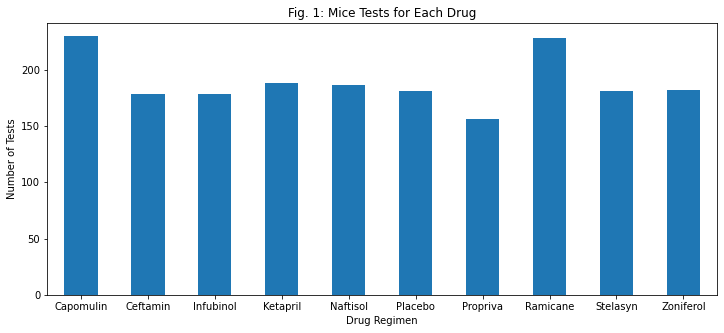

In [17]:
## Generate a bar plot showing the total number of mice tests on each drug regimen using pandas.
drug_tests = clean_df.groupby("Drug Regimen")["Mouse ID"].count()
mice_bars_pandas = drug_tests.plot.bar(figsize = (12, 5),title="Fig. 1: Mice Tests for Each Drug",rot=0)

# Set the xlabel and ylabel using class methods
mice_bars_pandas.set_xlabel("Drug Regimen")
mice_bars_pandas.set_ylabel("Number of Tests")

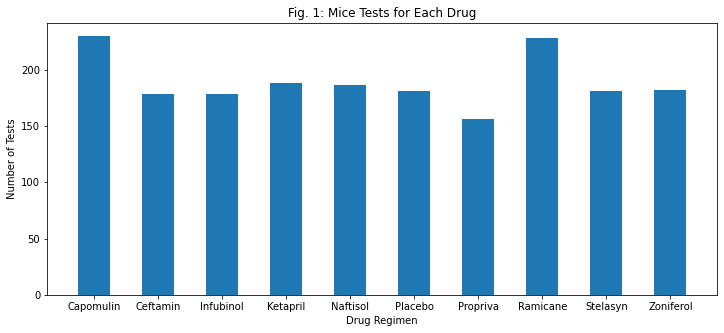

In [18]:
## Generate a bar plot showing the total number of mice tests on each drug regimen using pyplot.
drug_tests_dict = drug_tests.to_dict()
drugs = list(drug_tests_dict.keys())
tests = list(drug_tests_dict.values())

fig = plt.figure(figsize =(12, 5))

mice_bars_pyplot = plt.bar(drugs, tests,width = .5)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Tests")
plt.title("Fig. 1: Mice Tests for Each Drug")
plt.show()

<AxesSubplot:title={'center':'Fig. 2: Mice Tested'}>

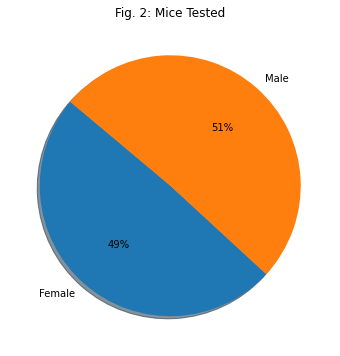

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_tests = clean_df.groupby("Sex")["Mouse ID"].count()
# sex_tests
sex_pie_pandas = sex_tests.plot.pie(ylabel="",figsize=(12, 6),autopct="%1.f%%", shadow=True, startangle=140, title = "Fig. 2: Mice Tested")
sex_pie_pandas

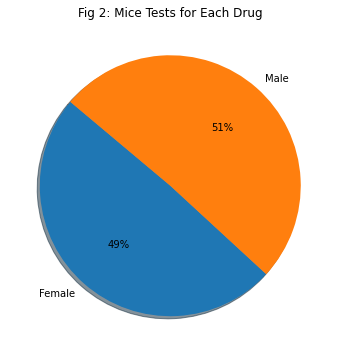

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_tests_dict = sex_tests.to_dict()
sex = list(sex_tests_dict.keys())
counts = list(sex_tests_dict.values())

fig = plt.figure(figsize =(12, 6))

plt.pie(counts, labels = sex, autopct="%1.f%%", shadow=True, startangle=140)

plt.title("Fig 2: Mice Tests for Each Drug")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_df = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_time_df = pd.merge(time_df,clean_df,how="left",on=["Mouse ID","Timepoint"])
final_time_df #only mouse IDs at the final timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [22]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

final_time_df.loc[:, "Drug Regimen"]

# Calculate the IterQuartileRange and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    tumor_vol = final_time_df.loc[final_time_df["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_vol)


    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowq = quartiles[.25]
    upq = quartiles[.75]
    inqr = upq - lowq
    lower_bound = lowq - (1.5*inqr)
    upper_bound = upq + (1.5*inqr)
    outliers = tumor_vol.loc[(tumor_vol<lower_bound)|(tumor_vol>upper_bound)]
    print(f"{drug} outliers = {outliers.values}")

tumor_vol_data

Capomulin outliers = []
Ramicane outliers = []
Infubinol outliers = [36.3213458]
Ceftamin outliers = []


[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 81     47.685963
 84     37.311846
 86     38.125164
 88     38.753265
 109    41.483008
 116    38.846876
 122    28.430964
 125    33.329098
 163    46.539206
 164    32.377357
 170    41.581521
 175    23.343598
 181    40.728578
 184    34.455298
 193    31.023923
 205    40.658124
 209    39.952347
 221    36.041047
 227    28.484033
 240    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 77     33.562402
 78     36.374510
 92     31.560470
 94     36.134852
 97     22.050126
 120    30.564625
 127    31.095335
 158    45.220869
 159    36.561652
 167    37.225650
 169    43.419381
 178    30.276232
 191    40.667713
 218    43.166373
 236    44.183451
 245    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

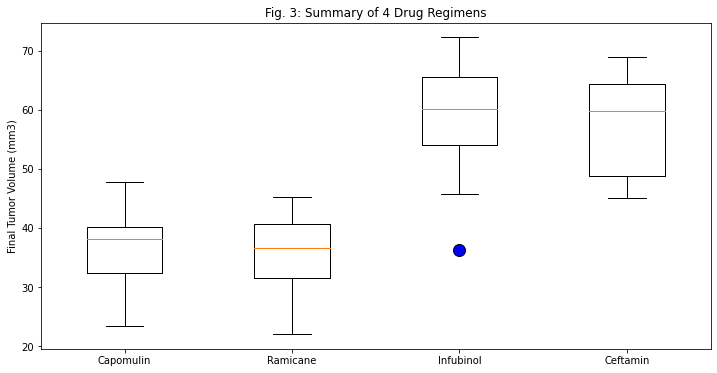

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure(figsize =(12, 6))

drug_outliers = dict(markerfacecolor="blue", markersize=12) # Do not completely understand this yet
plt.boxplot(tumor_vol_data, labels=treatment_list,flierprops=drug_outliers)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Fig. 3: Summary of 4 Drug Regimens")
plt.show()

## Line and Scatter Plots

In [24]:
# Collect data for a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capo_data = clean_df[(clean_df["Drug Regimen"]=='Capomulin')].drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
mouse_capo_data = capo_data[(capo_data["Mouse ID"]=='s185')]
mouse_capo_data.style.format(style_dict)

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
10,s185,Capomulin,0,45.000
11,s185,Capomulin,5,43.878
12,s185,Capomulin,10,37.615
13,s185,Capomulin,15,38.177
14,s185,Capomulin,20,36.867
15,s185,Capomulin,25,33.950
16,s185,Capomulin,30,32.960
17,s185,Capomulin,35,28.329
18,s185,Capomulin,40,25.472
19,s185,Capomulin,45,23.344


Text(0.5, 1.0, 'Fig. 4: Capomulin Regimen on Mouse  s185')

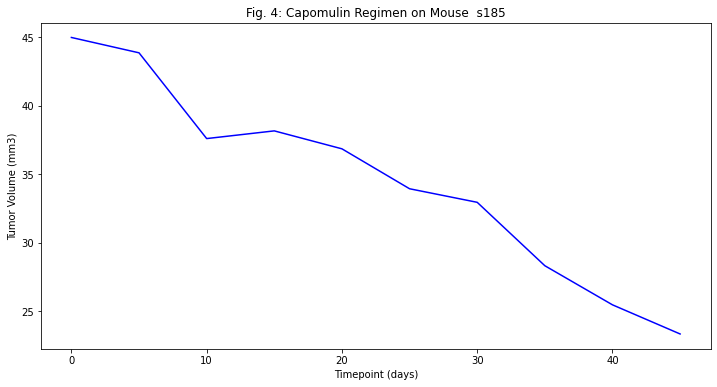

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig = plt.figure(figsize =(12, 6))

time_cap_s185 = mouse_capo_data["Timepoint"]
time_cap_s185

tumor_cap_s185 = mouse_capo_data["Tumor Volume (mm3)"]
tumor_cap_s185

mouse_capo_liner = plt.plot(time_cap_s185, tumor_cap_s185, color="blue")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Fig. 4: Capomulin Regimen on Mouse  s185")

Text(0.5, 1.0, 'Fig. 4a: Capomulin Regimen on Sample of 60 Mice')

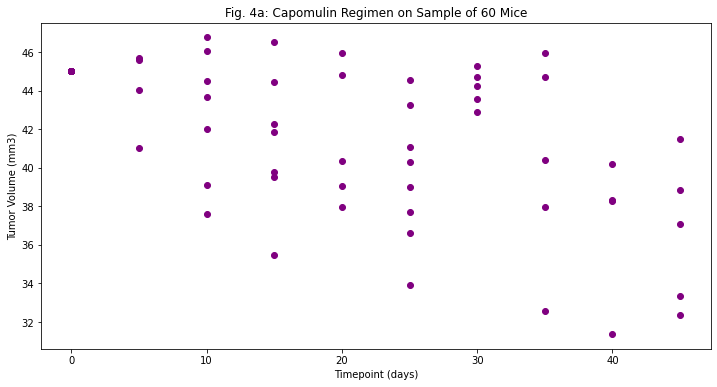

In [26]:
## Create sample set of mice treated with Capomulin
subset = capo_data.sample(60)
subset

## Generate a scatter plot of tumor volume vs. time point for sample of mice treated with Capomulin
fig = plt.figure(figsize =(12, 6))

time_cap_sample60 = subset["Timepoint"]
time_cap_sample60

tumor_cap_sample60 = subset["Tumor Volume (mm3)"]
tumor_cap_sample60

sample60_capo_liner = plt.scatter(time_cap_sample60, tumor_cap_sample60, color="purple")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Fig. 4a: Capomulin Regimen on Sample of 60 Mice")

In [27]:
# Collect data for a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_capo_data = clean_df[(clean_df["Drug Regimen"]=='Capomulin')].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_capo_data

,Mouse ID,Drug Regimen,Weight (g),Tumor Volume (mm3)
10,s185,Capomulin,17,45.000000
11,s185,Capomulin,17,43.878496
12,s185,Capomulin,17,37.614948
13,s185,Capomulin,17,38.177232
14,s185,Capomulin,17,36.866876
...,...,...,...,...
440,i557,Capomulin,24,47.685963
1452,r157,Capomulin,25,45.000000
1453,r157,Capomulin,25,45.597064
1454,r157,Capomulin,25,46.059608


The correlation between average tumor volume and mouse weight is 0.84


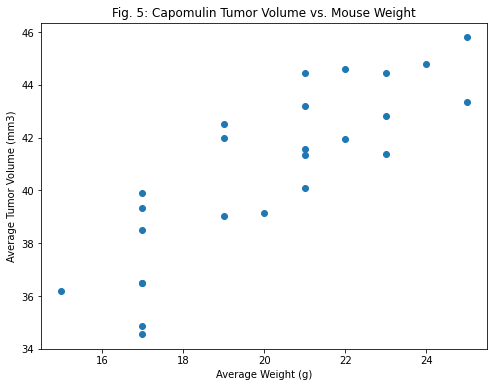

In [48]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig = plt.figure(figsize =(8, 6))

avg_weight_capo = weight_capo_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_capo

avg_tumor_capo = weight_capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_capo

plt.scatter(avg_weight_capo,avg_tumor_capo)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel('Average Weight (g)')
plt.title("Fig. 5: Capomulin Tumor Volume vs. Mouse Weight")

# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation_capo = st.pearsonr(avg_weight_capo,avg_tumor_capo)
print(f"The correlation between average tumor volume and mouse weight is {round(correlation_capo[0],2)}")

## Correlation and Regression

The correlation between average tumor volume and mouse weight is 0.84


Text(0.5, 1.0, 'Fig. 6: Capomulin Tumor Volume vs. Mouse Weight Regression')

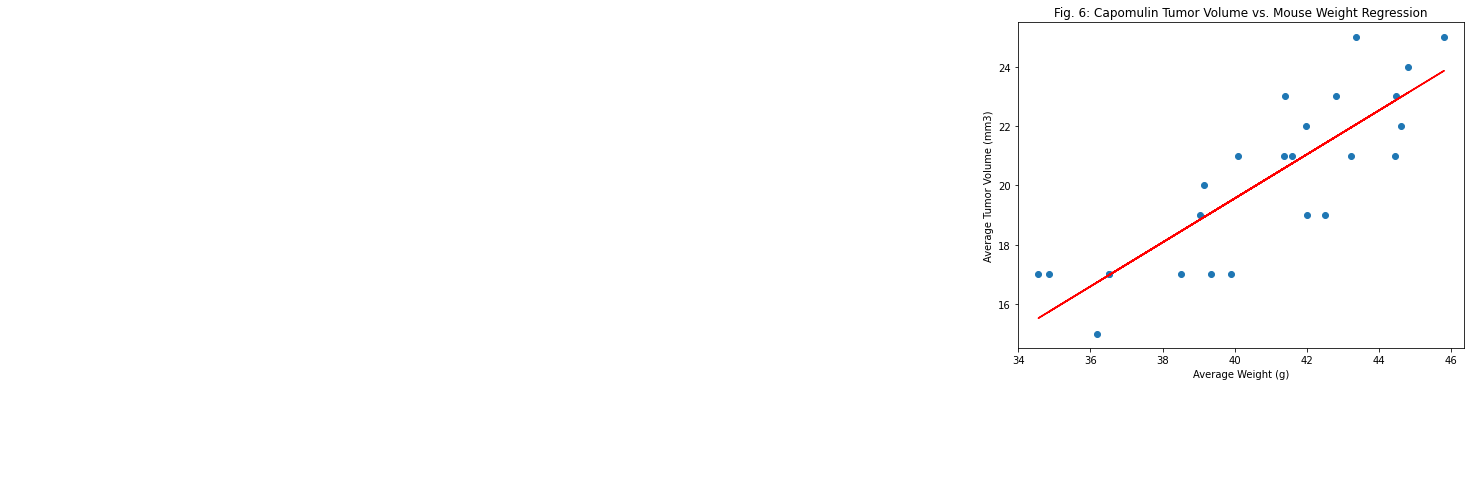

In [30]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
fig = plt.figure(figsize =(8, 6))

x_values = avg_tumor_capo
y_values = avg_weight_capo
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Fig. 6: Capomulin Tumor Volume vs. Mouse Weight Regression")

## Additional Data

Text(0.5, 1.0, 'Fig. 7: Capomulin Regimen on All Mice')

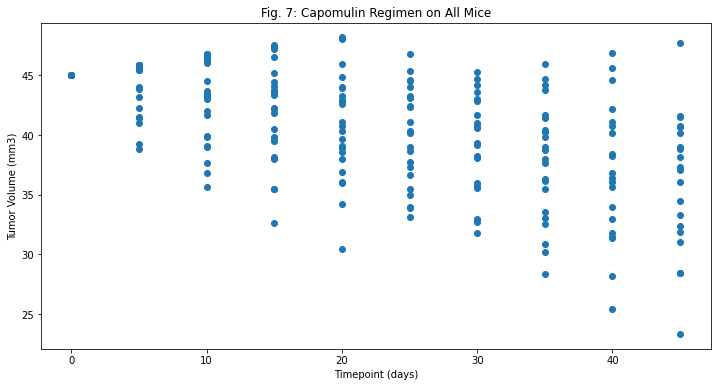

In [43]:
# Collect data for a line plot of tumor volume vs. time point for all mice treated with Capomulin
capo_data = clean_df[(clean_df["Drug Regimen"]=='Capomulin')].drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
capo_data

fig = plt.figure(figsize =(12, 6))

time_cap_all = capo_data["Timepoint"]
time_cap_all

tumor_cap_all = capo_data["Tumor Volume (mm3)"]
tumor_cap_all

capo_liner = plt.scatter(time_cap_all, tumor_cap_all)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Fig. 7: Capomulin Regimen on All Mice")

Text(0.5, 1.0, 'Fig. 8: Ramicane Regimen on All Mice')

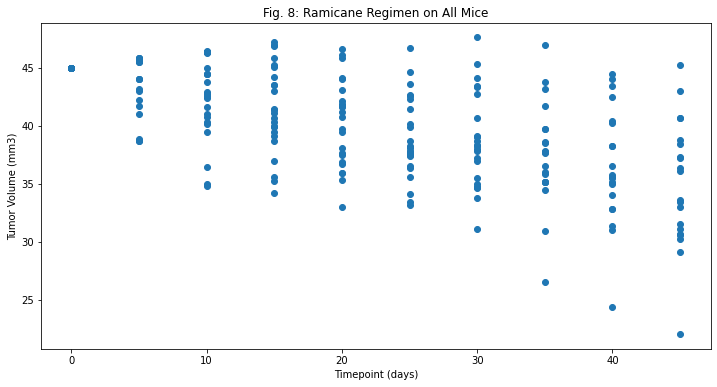

In [44]:
# Collect data for a line plot of tumor volume vs. time point for all mice treated with Capomulin
rami_data = clean_df[(clean_df["Drug Regimen"]=='Ramicane')].drop(columns=['Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites'])
rami_data.style.format(style_dict)

fig = plt.figure(figsize =(12, 6))

time_rami_all = rami_data["Timepoint"]
time_rami_all

tumor_rami_all = rami_data["Tumor Volume (mm3)"]
tumor_rami_all

rami_liner = plt.scatter(time_rami_all, tumor_rami_all)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Fig. 8: Ramicane Regimen on All Mice")

The correlation between average tumor volume and mouse weight is 0.81


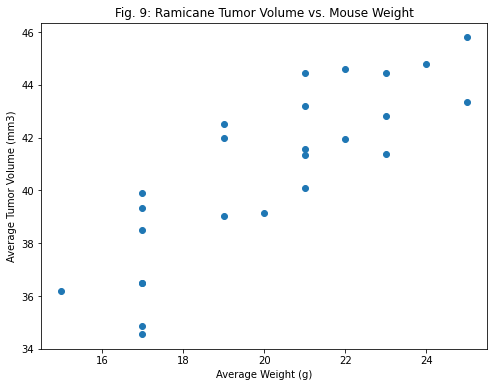

In [46]:
fig = plt.figure(figsize =(8, 6))

# Collect data for a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_rami_data = clean_df[(clean_df["Drug Regimen"]=='Ramicane')].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_rami_data

avg_weight_rami = weight_rami_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_rami

avg_tumor_rami = weight_rami_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_rami

plt.scatter(avg_weight_capo,avg_tumor_capo)
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel('Average Weight (g)')
plt.title("Fig. 9: Ramicane Tumor Volume vs. Mouse Weight")

correlation_rami = st.pearsonr(avg_weight_rami,avg_tumor_rami)
print(f"The correlation between average tumor volume and mouse weight is {round(correlation_rami[0],2)}")

In [35]:
# Collect data for a scatter plot of average tumor volume vs. mouse weight for the Ceftamin regimen

#____Capomulin
weight_capo_data = clean_df[(clean_df["Drug Regimen"]=='Capomulin')].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_capo_data

avg_weight_capo = weight_capo_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_capo

avg_tumor_capo = weight_capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_capo


#____Ramicane
weight_rami_data = clean_df[(clean_df["Drug Regimen"]=='Ramicane')].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_rami_data

avg_weight_rami = weight_rami_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_rami

avg_tumor_rami = weight_rami_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_rami


#____Ceftamin
weight_ceft_data = clean_df[(clean_df["Drug Regimen"]=="Ceftamin")].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_ceft_data

avg_weight_ceft = weight_ceft_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_ceft

avg_tumor_ceft = weight_ceft_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_ceft


#____Infubinol
weight_infu_data = clean_df[(clean_df["Drug Regimen"]=="Infubinol")].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_infu_data

avg_weight_infu = weight_infu_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_infu

avg_tumor_infu = weight_infu_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_infu


#____Placebo
weight_plac_data = clean_df[(clean_df["Drug Regimen"]=="Placebo")].drop(columns=['Sex', 'Age_months', 'Timepoint', 'Metastatic Sites'])
weight_plac_data

avg_weight_plac = weight_plac_data.groupby("Mouse ID")['Weight (g)'].mean()
avg_weight_plac

avg_tumor_plac = weight_plac_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
avg_tumor_plac

#______

correlation_capo = st.pearsonr(avg_weight_capo,avg_tumor_capo)
print(f"The Capomulin correlation between average tumor volume and mouse weight is {round(correlation_capo[0],2)}")

correlation_rami = st.pearsonr(avg_weight_rami,avg_tumor_rami)
print(f"The Ramicane correlation between average tumor volume and mouse weight is {round(correlation_rami[0],2)}")

correlation_ceft = st.pearsonr(avg_weight_ceft,avg_tumor_ceft)
print(f"The Ceftamin correlation between average tumor volume and mouse weight is {round(correlation_ceft[0],2)}")

correlation_infu = st.pearsonr(avg_weight_infu,avg_tumor_infu)
print(f"The Infubinol correlation between average tumor volume and mouse weight is {round(correlation_infu[0],2)}")

correlation_plac = st.pearsonr(avg_weight_plac,avg_tumor_plac)
print(f"The Placebo correlation between average tumor volume and mouse weight is {round(correlation_plac[0],2)}")

The Capomulin correlation between average tumor volume and mouse weight is 0.84
The Ramicane correlation between average tumor volume and mouse weight is 0.81
The Ceftamin correlation between average tumor volume and mouse weight is -0.04
The Infubinol correlation between average tumor volume and mouse weight is -0.06
The Placebo correlation between average tumor volume and mouse weight is -0.17


In [38]:
# tumor_change_vsweight [average tumor vol at start] from [average tumor vol at end] groupby [drug] vs weight
# tumor_change_vstime [average tumor vol at start] from [average tumor vol at end] groupby [drug] over time
time_vs_weight = clean_df.drop(columns=['Sex', 'Age_months', 'Metastatic Sites'])
time_vs_weight["Mouse ID"].value_counts()

l725    10
j989    10
c402    10
p136    10
v923    10
        ..
h428     1
u153     1
o848     1
n482     1
x336     1
Name: Mouse ID, Length: 249, dtype: int64

The correlation between average tumor volume and mouse weight is 0.66


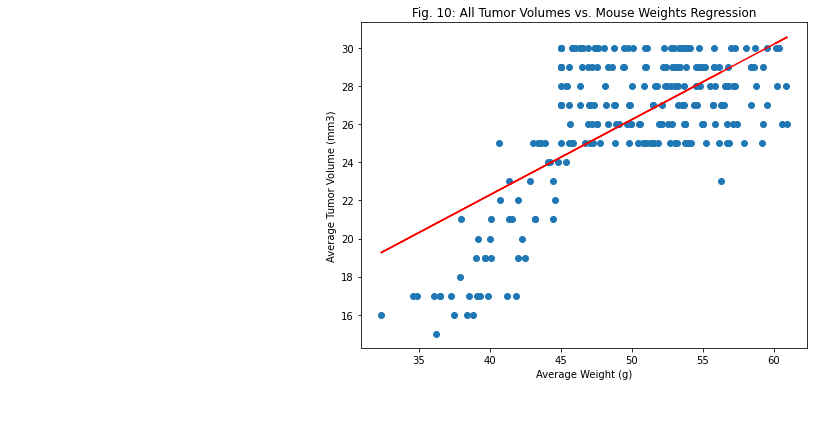

In [47]:
mouse_tvw = time_vs_weight.groupby("Mouse ID")['Weight (g)'].mean()
mouse_tvw

mouse_tvt = time_vs_weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_tvt


fig = plt.figure(figsize =(8, 6))

x_values = mouse_tvt
y_values = mouse_tvw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Average Weight (g)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Fig. 10: All Tumor Volumes vs. Mouse Weights Regression")


# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation_all = st.pearsonr(mouse_tvw,mouse_tvt)
print(f"The correlation between average tumor volume and mouse weight is {round(correlation_all[0],2)}")